Bài tập

Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng.

Hãy dùng mô hình học được: dự đoán xem căn nhà có thông số sau khả năng cao là giá bao nhiêu:

width = 5, length = 10

width = 20, length = 20

width = 10, length = 40

Nộp bài

Code và chạy kết quả lưu vào file notebook NMMH_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)

Nộp file notebook có đuôi .ipynb và nộp về: huynhthanh98vn@gmail.com

Deadline: 23g59 thứ 6 ngày 15/04/2022. Nộp trễ bị chia đôi số điểm.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import Data
df = pd.read_csv('/content/gdrive/MyDrive/House_Price_2.csv')
df.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


Text(0, 0.5, 'price')

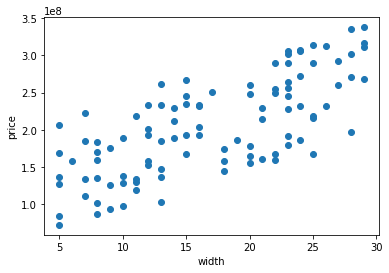

In [ ]:
#Mô tả width và price
plt.scatter(df["width"], df["price"])
plt.xlabel("width")
plt.ylabel("price")

Text(0, 0.5, 'price')

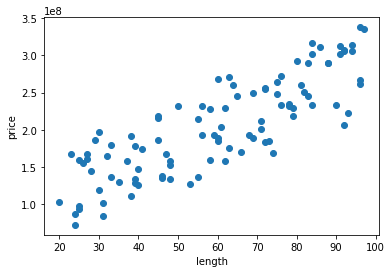

In [ ]:
#Mô tả length và price
plt.scatter(df["length"], df["price"])
plt.xlabel("length")
plt.ylabel("price")

Chúng ta sẽ dữ dụng mô hình hồi quy bội để xây dựng mô hình tuyến tính

X  = ['width','length']

y  = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết:  $\hat{y}=$𝛽1$X1 + $𝛽2$X2 + $𝛽3   

với   $𝛽1$, $𝛽2$, $𝛽3$  là số thực

Ta tìm  $𝛽1$, $𝛽2$, $𝛽3$  sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $𝛽1$, $𝛽2$, $𝛽3$  sao cho

$$ \frac{1}{n} \sum (y-\hat{y})^2 = \frac{1}{n} \sum (y − 𝛽1X1 - 𝛽2X2 - 𝛽3)^2 $$

đạt giá trị nhỏ nhất, với  n  là số mẫu.

Với  X ,  y  là các ma trận với mỗi hàng là một sample,  X  là data và  y  là target. Gọi  Z  là mận trận mở rộng của  X  nhưng có thêm một cột toàn số 1. Khi đó nghiệm của bài toán Linear Regression là

$$(Z^TZ)^{-1}Z^Ty.$$

Tức là trong bài toán này, mỗi hàng của  X  là ['width','length'] của một căn nhà, tương ứng hàng của  y  là giá của nhà đó.

In [ ]:
#Tách X
X = df[['width','length']]
#Tách Y
Y = df['price']
print(X.head())
print(Y.head())

   width  length
0     28      97
1     21      62
2     27      64
3      5      92
4     13      84
0    3.350184e+08
1    2.298295e+08
2    2.603552e+08
3    2.064708e+08
4    2.339808e+08
Name: price, dtype: float64


In [ ]:
one = np.ones((len(X),1))
Z = np.append(one, X, axis=1)
print(X.shape)
print(Z.shape)

(100, 2)
(100, 3)


In [ ]:
Y = np.array(Y).reshape((len(Y),1))
print(Y.shape)

(100, 1)


In [ ]:
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), Y)
#print(beta)
print('Beta 1: ', beta[0][0])
print('Beta 2: ', beta[1][0])
print('Beta 3: ', beta[2][0])
print("Hàm số: y = {}*X1 +{}*X2+{}".format(beta[0][0],beta[1][0],beta[2][0]))

Beta 1:  844994.8258758411
Beta 2:  4992438.834851142
Beta 3:  1997577.0972277774
Hàm số: y = 844994.8258758411*X1 +4992438.834851142*X2+1997577.0972277774


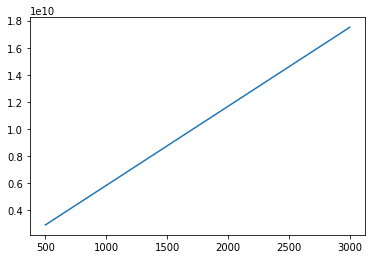

In [ ]:
plt.plot(np.arange(500, 3000), beta[0][0]*np.arange(500, 3000) + beta[1][0]*np.arange(500, 3000) + beta[2][0]) 